# Sales Prediction on the basis of advertisement source.

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [3]:
df = pd.read_csv("Advertising.csv")

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:>

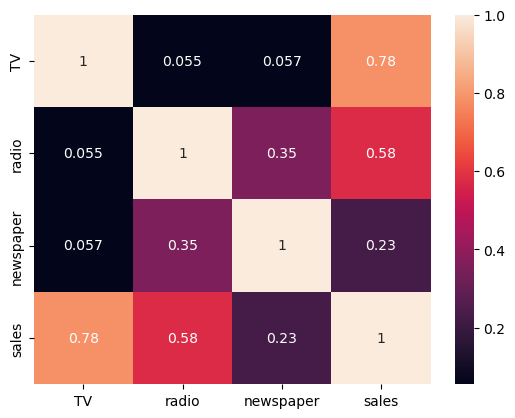

In [9]:
sns.heatmap(df.corr(), annot=True)

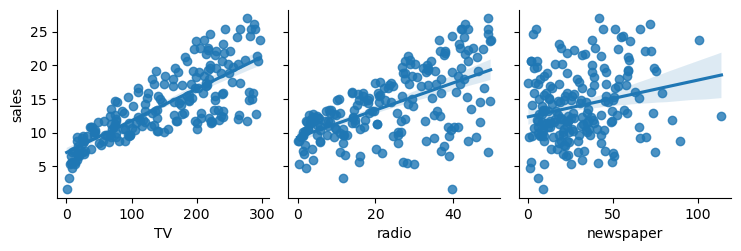

In [10]:
sns.pairplot(df, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales' ,kind='reg')

## Encoding of Independent & Dependent Data

In [11]:
X = df.drop(['sales'], axis = 1)
y = df['sales']

In [12]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [13]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

## Splitting the dataset into the Training set and Test set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [15]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((150, 3), (150,), (50, 3), (50,))

## ANN Model

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

no_features_columns = len(X_train.keys())
no_target_columns = 1

tf.random.set_seed(101)
annModel = Sequential([
    Dense(32, activation='relu', input_shape=[no_features_columns]),
    Dense(16, activation='relu'),
    Dense(no_target_columns)
])

In [18]:
annModel.compile(
    optimizer = 'RMSprop',
    loss = 'mean_squared_error',
    metrics=['mean_squared_error']
)

In [19]:
annModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                128       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 673
Trainable params: 673
Non-trainable params: 0
_________________________________________________________________


In [20]:
annModel.fit(X_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
15/15 [==============================] - 1s 1ms/step - loss: 249.5348 - mean_squared_error: 249.5348
Epoch 2/100
15/15 [==============================] - 0s 1ms/step - loss: 46.4125 - mean_squared_error: 46.4125
Epoch 3/100
15/15 [==============================] - 0s 1ms/step - loss: 29.6298 - mean_squared_error: 29.6298
Epoch 4/100
15/15 [==============================] - 0s 1ms/step - loss: 19.3878 - mean_squared_error: 19.3878
Epoch 5/100
15/15 [==============================] - 0s 1ms/step - loss: 13.0144 - mean_squared_error: 13.0144
Epoch 6/100
15/15 [==============================] - 0s 1ms/step - loss: 9.0099 - mean_squared_error: 9.0099
Epoch 7/100
15/15 [==============================] - 0s 1ms/step - loss: 6.9182 - mean_squared_error: 6.9182
Epoch 8/100
15/15 [==============================] - 0s 2ms/step - loss: 6.2797 - mean_squared_error: 6.2797
Epoch 9/100
15/15 [==============================] - 0s 1ms/step - loss: 4.6489 - mean_squared_error: 4.6489
Epoch 1

15/15 [==============================] - 0s 1ms/step - loss: 2.2611 - mean_squared_error: 2.2611
Epoch 76/100
15/15 [==============================] - 0s 1ms/step - loss: 2.2767 - mean_squared_error: 2.2767
Epoch 77/100
15/15 [==============================] - 0s 1ms/step - loss: 1.6353 - mean_squared_error: 1.6353
Epoch 78/100
15/15 [==============================] - 0s 1ms/step - loss: 2.3735 - mean_squared_error: 2.3735
Epoch 79/100
15/15 [==============================] - 0s 1ms/step - loss: 2.0278 - mean_squared_error: 2.0278
Epoch 80/100
15/15 [==============================] - 0s 1ms/step - loss: 1.9266 - mean_squared_error: 1.9266
Epoch 81/100
15/15 [==============================] - 0s 1ms/step - loss: 2.2793 - mean_squared_error: 2.2793
Epoch 82/100
15/15 [==============================] - 0s 1ms/step - loss: 2.1406 - mean_squared_error: 2.1406
Epoch 83/100
15/15 [==============================] - 0s 1ms/step - loss: 2.0442 - mean_squared_error: 2.0442
Epoch 84/100
15/15 [===

In [21]:
y_predNN = annModel.predict(X_test).flatten()

MAE = mean_absolute_error(y_test, y_predNN)
MSE = mean_squared_error(y_test, y_predNN)
RMSE = np.sqrt(MSE)

print(f"MAE: {round(MAE, 2)}")
print(f"MSE: {round(MSE, 2)}")
print(f"RMSE: {round(RMSE, 2)}")

2/2 [==============================] - 0s 3ms/step
MAE: 1.09
MSE: 2.48
RMSE: 1.57


In [22]:
results_df = pd.DataFrame({'Predicted Price': y_predNN, 'Actual Price':y_test, 'Difference':round((y_test - y_predNN), 2)})
results_df.head()

,Predicted Price,Actual Price,Difference
37,14.685575,14.7,0.01
109,19.075115,19.8,0.72
31,11.403641,11.9,0.50
89,17.124409,16.7,-0.42
66,7.892449,9.5,1.61
